Saving carSUV_normalized.csv to carSUV_normalized.csv
Initial weights: w1: [0.417022] w2: [0.72032449]
Final error rate: 0.5
Final weights: w1 = [-3.38447355] w2 = [-7.66744513]


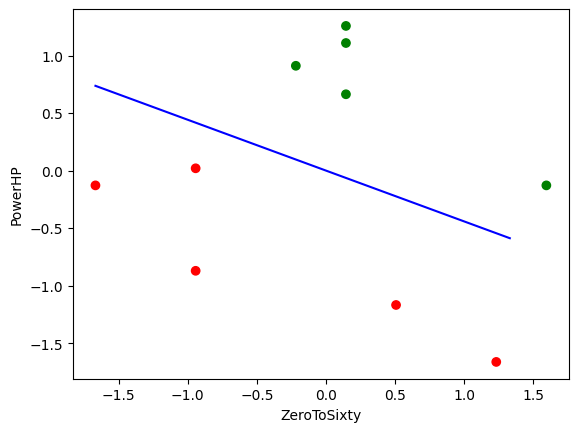

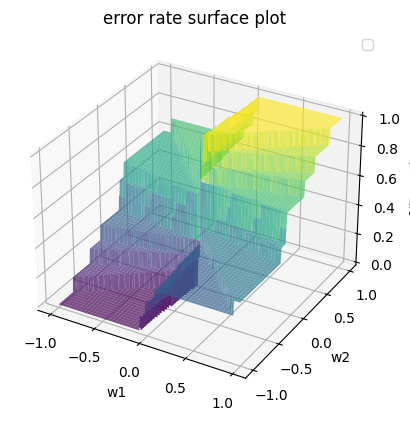

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# this reads in the dataframe
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("carSUV_normalized.csv", index_col="SampleName")

# this converts to numpy
df_numpy = df.to_numpy()

# this extracts the features
X = df_numpy[:, 0:2]
# print("X =", X)

# this extracts the classes
Y = df_numpy[:, 2]
# convert 0/1 to -1/1
Y[Y == 0] = -1
# print(Y)

# this sets the initial learning rate
c = 0.1

# this sets the initial weights
np.random.seed(1)
w1 = np.random.random(1)
w2 = np.random.random(1)
print("Initial weights: w1:", w1, "w2:", w2)

# this sets the number of epochs
epochs = 10
epoch_count = 0
error_count = 0
error_rate = 0

# this trains the classifier
for epoch in range(epochs):
    count_of_error = 0
    error_rate = 0
    for i in range(len(X)):
        # predict the class
        fxi = np.sign(w1 * X[i][0] + w2 + X[i][1])
        # compare the predicted class to the true class
        if fxi != Y[i]:
            # print("Incorrect. Y =", Y[i], "fxi =", fxi)
            count_of_error += 1
            # update the weights
            w1 = w1 + c * (Y[i] - fxi) * X[i][0]
            w2 = w2 + c * (Y[i] - fxi) * X[i][1]
    epoch_count += 1
    error_rate = count_of_error / 10
print("Final error rate:", error_rate)
print("Final weights: w1 =", w1, "w2 =", w2)

# label x-axis and y-axis
plt.xlabel("ZeroToSixty")
plt.ylabel("PowerHP")

# plotting the data
colors = []
for i in range(len(X)):
    if Y[i] == 1:
        colors.append("red")
    else:
        colors.append("green")
plt.scatter(X[:, 0], X[:, 1], c=colors)

# calculating the line
line = []
for x in np.arange(min(X[:, 0]), max(X[:, 0])):
    line.append(-((w1 * x) / w2))
# plot the line
plt.plot(np.arange(min(X[:, 0]), max(X[:, 0])), line, color="blue")

# show plot
plt.show()


def function_error_rate(w1, w2, datasetX, datasetY):
    if isinstance(w1, np.ndarray) and isinstance(w2, np.ndarray):
        # calculates the error rate for all the values of w1 and w2 in the given meshgrid
        error_meshgrid = np.zeros_like(w1)
        for i in range(len(w1)):
            for j in range(len(w2)):
                error_meshgrid[i][j] = function_error_rate(w1[i][j], w2[i][j], datasetX, datasetY)
        return error_meshgrid

    count_of_error = 0
    for i in range(len(datasetX)):
        fxi = np.sign(w1 * datasetX[i][0] + w2 * datasetX[i][1])
        if np.any(fxi != datasetY[i]):
            count_of_error += 1
    error_rate = count_of_error / len(datasetX)
    return error_rate


def plot_function_on_grid(function_to_plot, datasetX, datasetY):
    # Create a meshgrid
    w1 = np.arange(-1, 1, 0.01)
    w2 = np.arange(-1, 1, 0.01)
    W1, W2 = np.meshgrid(w1, w2)
    error_rates_values_for_W1W2 = function_to_plot(W1, W2, datasetX, datasetY)

    # Create a figure and a 3D axis
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create the surface plot
    surface = ax.plot_surface(W1, W2, error_rates_values_for_W1W2, cmap='viridis', alpha=0.7)

    # Add labels and title
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_zlabel('error rate')
    ax.set_title('error rate surface plot')

    return ax;


# plot function surface
ax = plot_function_on_grid(function_error_rate, X, Y);
plt.legend()
plt.show()
